In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

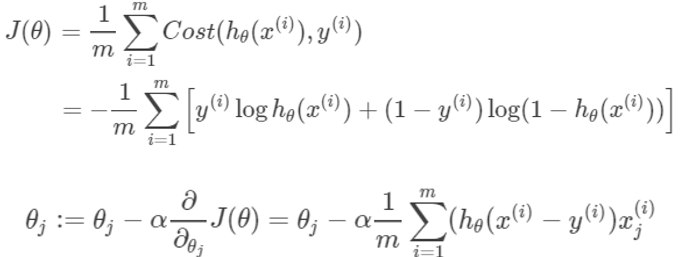

In [6]:
Image(filename = '逻辑回归公式.png', width=320, height=260)

In [69]:
def sigmoid(z): # 输出shape(m ,1)
    out = 1 / (1 + np.exp(-z))
    return out.reshape(-1,1)

def logistic_func(X,weights,bias): # Logistic函数,输出shape(m ,1)
    return sigmoid(np.dot(X,weights)+bias)

def cost_func(X, y,weights,bias): #逻辑回归交叉熵损失函数， 输出shape(1 ,1)
    sample_num, dim = X.shape
    left = np.multiply(y, np.log(logistic_func(X, weights,bias)+1e-5))
    right = np.multiply(1 - y, np.log(1 - logistic_func(X, weights,bias)+1e-5))
    
    cost = -np.sum(left + right) / sample_num
    return cost.reshape(1,1)

def gradient_func(X, y, weights,bias): #逻辑回归的梯度， 输出shape(m ,1)
    sample_num, dim = X.shape
    error = logistic_func(X,weights,bias) - y
    weights_grad =(1./sample_num) * np.dot(X.T, error)
    bias_grad = (1./sample_num) * np.dot(np.ones(shape=(1,sample_num)),error)
    return weights_grad,bias_grad

def logistic_Regression(X, y, alpha):# 逻辑回归的梯度下降
    sample_num, dim = X.shape
    weights=np.ones(shape=(dim,1))#初始化theta和b
    bias=np.array([[1]])
    y = y.reshape(-1,1)
    cost_init = cost_func(X,y,weights, bias)
    weights_grad,bias_grad = gradient_func(X, y, weights, bias)
    loop_num =0
    
    while not np.all(np.absolute(weights_grad) <= 1e-4):
        weights = weights - alpha * weights_grad
        bias = bias - alpha * bias_grad
        weights_grad,bias_grad = gradient_func(X, y, weights, bias)
        cost = cost_func(X, y, weights,bias)
        loop_num = loop_num +1
        if loop_num % 1000==0:
            print("cost",cost," of loop_num",loop_num)
            print("weights:",weights)
            print("weights_grad:",weights_grad)
    weights_np = weights.flatten()
    bias_np = bias.flatten()
    return weights_np,bias_np

def predict(X,weights,bias,threshold):
    preds = logistic_func(X,weights,bias)
    preds_01 = np.where(preds>threshold,1,0)
    return preds_01


In [52]:

iris = datasets.load_iris()
X= iris['data']
y = iris['target']
X = X[y!=2]
y=y[y!=2]
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 4)
weights_np,bias_np = logistic_Regression(X_train,y_train,0.06)
print("参数:",weights_np)



cost [[0.01234153]]  of loop_num 1000
weights: [[-0.85605426]
 [-1.46926018]
 [ 2.68240797]
 [ 1.86023836]]
weights_grad: [[ 0.00166204]
 [ 0.0071203 ]
 [-0.01049946]
 [-0.00481993]]
cost [[0.00653803]]  of loop_num 2000
weights: [[-0.92517547]
 [-1.76985564]
 [ 3.12533644]
 [ 2.06585088]]
weights_grad: [[ 0.00083003]
 [ 0.003665  ]
 [-0.0053954 ]
 [-0.00253307]]
cost [[0.00450659]]  of loop_num 3000
weights: [[-0.96554409]
 [-1.94972359]
 [ 3.38994253]
 [ 2.19093577]]
weights_grad: [[ 0.00055267]
 [ 0.00248487]
 [-0.00365279]
 [-0.00173868]]
cost [[0.00345999]]  of loop_num 4000
weights: [[-0.99415637]
 [-2.07919422]
 [ 3.58015468]
 [ 2.28192371]]
weights_grad: [[ 0.00041421]
 [ 0.00188631]
 [-0.0027696 ]
 [-0.00133142]]
cost [[0.00281805]]  of loop_num 5000
weights: [[-1.01633787]
 [-2.18070329]
 [ 3.72912387]
 [ 2.35381421]]
weights_grad: [[ 0.00033126]
 [ 0.00152337]
 [-0.00223449]
 [-0.00108251]]
cost [[0.00238253]]  of loop_num 6000
weights: [[-1.03445742]
 [-2.26435718]
 [ 3.851

cost [[0.00037003]]  of loop_num 44000
weights: [[-1.233255  ]
 [-3.22171251]
 [ 5.24797197]
 [ 3.11761252]]
weights_grad: [[ 3.81036615e-05]
 [ 1.89505236e-04]
 [-2.75085164e-04]
 [-1.43119687e-04]]
cost [[0.00036216]]  of loop_num 45000
weights: [[-1.23551596]
 [-3.23296054]
 [ 5.26429876]
 [ 3.12610974]]
weights_grad: [[ 3.72671882e-05]
 [ 1.85454766e-04]
 [-2.69178951e-04]
 [-1.40139366e-04]]
cost [[0.00035461]]  of loop_num 46000
weights: [[-1.23772784]
 [-3.24397077]
 [ 5.28027883]
 [ 3.13443192]]
weights_grad: [[ 3.64669592e-05]
 [ 1.81576679e-04]
 [-2.63524755e-04]
 [-1.37284065e-04]]
cost [[0.00034738]]  of loop_num 47000
weights: [[-1.23989272]
 [-3.2547532 ]
 [ 5.29592679]
 [ 3.14258634]]
weights_grad: [[ 3.57006637e-05]
 [ 1.77860129e-04]
 [-2.58106693e-04]
 [-1.34545996e-04]]
cost [[0.00034043]]  of loop_num 48000
weights: [[-1.2420126 ]
 [-3.26531723]
 [ 5.31125638]
 [ 3.1505798 ]]
weights_grad: [[ 3.49661832e-05]
 [ 1.74295167e-04]
 [-2.52910193e-04]
 [-1.31918010e-04]]


cost [[0.00019312]]  of loop_num 86000
weights: [[-1.30097113]
 [-3.56124825]
 [ 5.74014296]
 [ 3.37614497]]
weights_grad: [[ 1.96766526e-05]
 [ 9.93919120e-05]
 [-1.43879671e-04]
 [-7.62748189e-05]]
cost [[0.00019093]]  of loop_num 87000
weights: [[-1.30214503]
 [-3.5671786 ]
 [ 5.74872755]
 [ 3.38069661]]
weights_grad: [[ 1.94539371e-05]
 [ 9.82895541e-05]
 [-1.42277638e-04]
 [-7.54486413e-05]]
cost [[0.00018879]]  of loop_num 88000
weights: [[-1.30330572]
 [-3.57304355]
 [ 5.75721709]
 [ 3.38519922]]
weights_grad: [[ 1.92362548e-05]
 [ 9.72117443e-05]
 [-1.40711368e-04]
 [-7.46406146e-05]]
cost [[0.00018669]]  of loop_num 89000
weights: [[-1.30445349]
 [-3.57884455]
 [ 5.7656137 ]
 [ 3.38965388]]
weights_grad: [[ 1.90234365e-05]
 [ 9.61576667e-05]
 [-1.39179668e-04]
 [-7.38501413e-05]]
cost [[0.00018464]]  of loop_num 90000
weights: [[-1.30558864]
 [-3.58458299]
 [ 5.77391941]
 [ 3.39406162]]
weights_grad: [[ 1.88153207e-05]
 [ 9.51265414e-05]
 [-1.37681401e-04]
 [-7.30766500e-05]]


In [68]:
preds = predict(X_test,weights_np,bias_np,threshold=0.5)

print("测试数据准确率:",accuracy_score(preds, y_test)) 

logr = LogisticRegression()
logr.fit(X_train,y_train)
print("sklern中的逻辑回归准确率:",accuracy_score(logr.predict(X_test),y_test))

preds [[1.34025742e-04]
 [1.30341544e-05]
 [9.99989742e-01]
 [3.73441825e-06]
 [9.99999393e-01]
 [9.97014480e-04]
 [9.99997251e-01]
 [9.99989025e-01]
 [3.55017716e-03]
 [1.36218137e-04]
 [3.52880472e-04]
 [6.52592820e-05]
 [9.99978755e-01]
 [2.53823087e-04]
 [4.98207317e-05]
 [1.42688733e-05]
 [4.06280504e-07]
 [3.97088718e-04]
 [2.39175187e-05]
 [9.99999085e-01]
 [9.99972996e-01]
 [1.77556351e-05]
 [9.99929857e-01]
 [9.99999417e-01]
 [9.99994282e-01]
 [9.99973343e-01]
 [4.15010505e-05]
 [9.99999808e-01]
 [9.99959862e-01]
 [1.90367325e-05]]
preds_01 [[0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]]
测试数据准确率: 1.0
sklern中的逻辑回归准确率: 1.0


C:\Users\lsx552\Anaconda3\envs\learn\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
